In [50]:
import pygame
import numpy as np
import time
import transforms3d.euler as euler
import graphics_np
import copy
import cv2
import os
import random
from tqdm import tqdm

import reader
from vistool import *
from skeleton import *
from smpl_np import SMPLModel
from imitator import Imitator
from obj_loader import OBJLoader

from OpenGL.GL import *
from OpenGL.GLU import *

from os import listdir
from os.path import isfile, join

In [51]:
img = cv2.imread('a.jpg')

In [52]:
img_to_mask = img.copy()
img_to_mask[~((img_to_mask[:, :, 0] >= 245) & (img_to_mask[:, :, 1] >= 245) & (img_to_mask[:, :, 2] >= 245))] = [0, 0, 0]
img_to_mask[((img_to_mask[:, :, 0] >= 245) & (img_to_mask[:, :, 1] >= 245) & (img_to_mask[:, :, 2] >= 245))] = [255, 255, 255]
kernel = np.ones((5,5),np.uint8)
img_to_mask = cv2.morphologyEx(img_to_mask, cv2.MORPH_CLOSE, kernel)

In [53]:
bkg = cv2.imread('characters/putin/original_bg.jpg')[:, :, ::-1]
orig = cv2.imread('characters/putin/original.jpg')[:, :, ::-1]

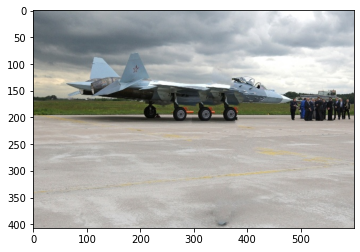

In [54]:
plt.imshow(bkg)

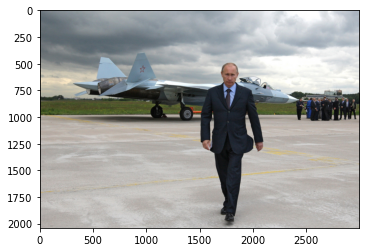

In [55]:
plt.imshow(orig)

In [63]:
# plt.imshow(img)

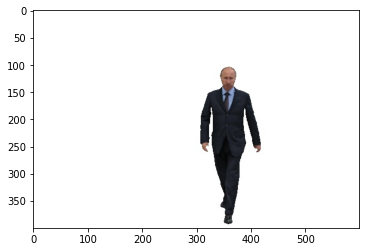

In [68]:
plt.imshow(img[200:600, 150:750])

In [56]:
plt.imshow(mask)

NameError: name 'mask' is not defined

In [26]:
x1, x2, y1, y2 = 285, 615, 400, 620
# x2 = 615
# y1 = 400
# y2 = 620

mask = np.int8(img_to_mask[x1:x2, y1:y2, :] / 255)

In [29]:
bkg = cv2.resize(bkg, (mask.shape[1], mask.shape[0]))

In [34]:
img_to_mask[x1:x2, y1:y2, :] = bkg * mask
img_to_mask[img_to_mask==0] = img[img_to_mask==0]
img=img_to_mask

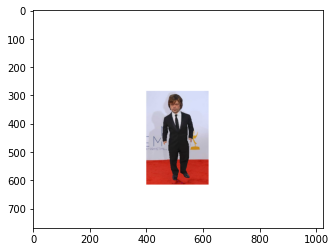

In [35]:
plt.imshow(img)